# Apartment Sales Ads Analysis

You have at your disposal data from the Yandex.Real Estate service — an archive of apartment sales advertisements in Saint Petersburg and neighboring settlements over several years. The goal is to learn to determine the market value of real estate properties. Your task is to establish parameters. This will enable the construction of an automated system: it will track anomalies and fraudulent activities.

For each apartment for sale, two types of data are available. The first type is entered by the user, and the second type is obtained automatically based on cartographic data. For example, the distance to the city center, airport, nearest park, and water body.

**Data Description**
* airports_nearest — distance to the nearest airport in meters (m)
* balcony — number of balconies
* ceiling_height — ceiling height in meters (m)
* cityCenters_nearest — distance to the city center in meters (m)
* days_exposition — how many days the advertisement was active (from publication to removal)
* first_day_exposition — publication date
* floor — floor number
* floors_total — total number of floors in the building
* is_apartment — apartment status (boolean type)
* kitchen_area — kitchen area in square meters (m²)
* last_price — price at the time of removal from publication
* living_area — living area in square meters (m²)
* locality_name — name of the locality
* open_plan — open-plan layout (boolean type)
* parks_around3000 — number of parks within a 3 km radius
* parks_nearest — distance to the nearest park in meters (m)
* ponds_around3000 — number of ponds within a 3 km radius
* ponds_nearest — distance to the nearest water body in meters (m)
* rooms — number of rooms
* studio — studio apartment status (boolean type)
* total_area — total area of the apartment in square meters (m²)
* total_images — number of photographs of the apartment in the ads

**Project navigation**

[1. Open the data file and review the general information](#1.-Open-the-data-file-and-review-the-general-information)
 - [Task 1. Load the data from the CSV file into a dataframe using the pandas library](#Task-1.-Load-the-data-from-the-CSV-file-into-a-dataframe-using-the-pandas-library.)
 - [Task 2. Display the first 10 rows of the dataframe data.](#Task-2.-Display-the-first-10-rows-of-the-dataframe-data.)
 - [Task 3. Display basic information about the dataframe using the info method](#Task-3.-Display-basic-information-about-the-dataframe-using-the-info-method.)
 - [Task 4. Plot a histogram for all numerical columns of the table on one graph.](#Task-4.-Plot-a-histogram-for-all-numerical-columns-of-the-table-on-one-graph.)

[2. Data Preprocessing](#2.-Data-Preprocessing)
 - [Task 1. Determine which columns have missing values.](#Task-1.-Determine-which-columns-have-missing-values.)
 - [Task 2. Let's review the data types in each column:](#Task-2.-Let's-review-the-data-types-in-each-column:)
 - [Task 3. Let's see the unique values in the column with names and eliminate implicit duplicates](#Task-3.-Let's-see-the-unique-values-in-the-column-with-names-and-eliminate-implicit-duplicates)
 - [Task 4. Anomalies in the data. Let's find and remove rare and outlier values](#Task-4.-Anomalies-in-the-data.-Let's-find-and-remove-rare-and-outlier-values)

[3. Calculate and apply new columns to dataframe](#3.-Calculate-and-apply-new-columns-to-dataframe)

[4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
 - [Task 1. Let's build a series of histograms to explore the most significant parameters:](#Task-1.-Let's-build-a-series-of-histograms-to-explore-the-most-significant-parameters:)
 - [Task 2. Learning how quickly apartments were sold (days_exposition column). This parameter shows how many days each ad was placed.](#Task-2.-Learning-how-quickly-apartments-were-sold-(days_exposition-column).-This-parameter-shows-how-many-days-each-ad-was-placed.)
 - [Task 3. What factors most affect the total cost of the object? Learning whether the price depends on:](#Task-3.-What-factors-most-affect-the-total-cost-of-the-object?-Learning-whether-the-price-depends-on:)
 - [Task 4. Calculating the average price per square meter in 10 localities with the largest number of ads](#Task-4.-Calculating-the-average-price-per-square-meter-in-10-localities-with-the-largest-number-of-ads)
 - [Task 5. How does the cost of the objects depend on the distance to the city center](#Task-5.-How-does-the-cost-of-the-objects-depend-on-the-distance-to-the-city-center)

[Main summary](#Main-summary)


## 1. Open the data file and review the general information

#### Task 1. Load the data from the CSV file into a dataframe using the pandas library.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

Examine the columns with numerical description

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Task 2. Display the first 10 rows of the dataframe data.

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Task 3. Display basic information about the dataframe using the info method

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Task 4. Plot a histogram for all numerical columns of the table on one graph.

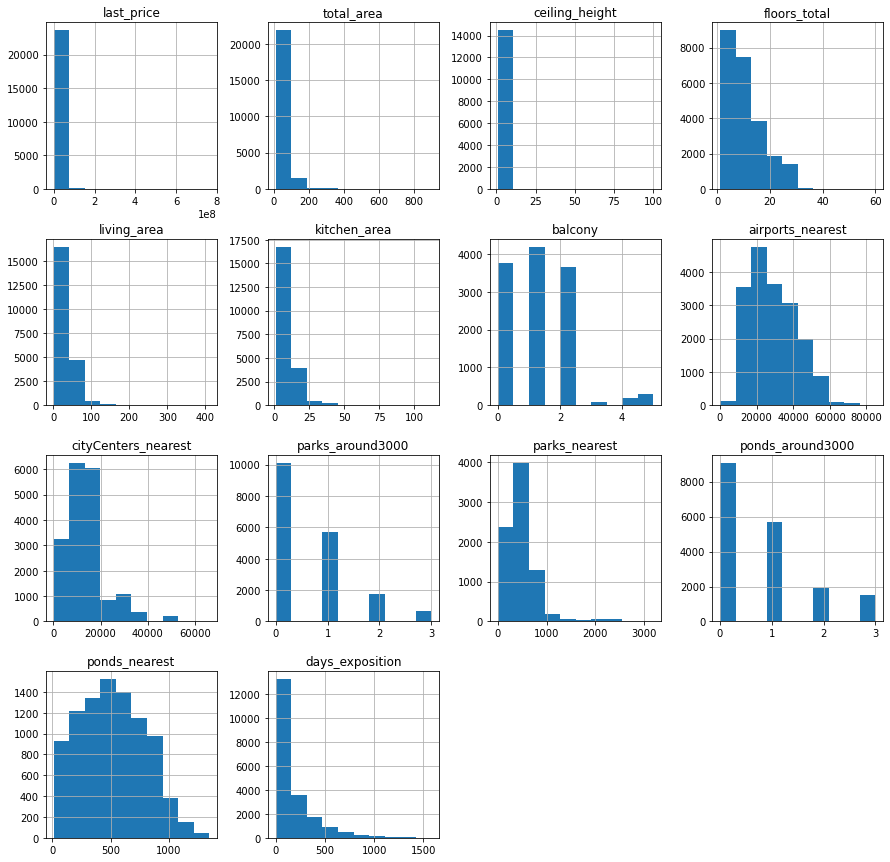

In [6]:
# Filter numeric columns, excluding columns with boolean values
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

# Plot a histogram for numerical columns
data[numeric_columns].hist(bins=10, figsize=(15, 15))
plt.show()

**Section summary:**

The general information about the dataset indicates that there are missing values, incorrect data formats, and outliers in the data.
The next step is to address these issues and apply data preprocessing to resolve the aforementioned problems.

## 2. Data Preprocessing

#### Task 1. Determine which columns have missing values.

In [7]:
# show only columns with missing value
data.isnull().sum()[data.isnull().sum() > 0].sort_values(ascending=False)

is_apartment           20924
parks_nearest          15620
ponds_nearest          14589
balcony                11519
ceiling_height          9195
airports_nearest        5542
cityCenters_nearest     5519
ponds_around3000        5518
parks_around3000        5518
days_exposition         3181
kitchen_area            2278
living_area             1903
floors_total              86
locality_name             49
dtype: int64

In [8]:
# Automate the above code and display the percentage of missing values out of all data
pd.DataFrame(round(data.isnull().mean()[data.isnull().mean() > 0]*100,1).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
is_apartment,88.300000
parks_nearest,65.900000
ponds_nearest,61.600000
balcony,48.600000
ceiling_height,38.800000
airports_nearest,23.400000
ponds_around3000,23.300000
parks_around3000,23.300000
cityCenters_nearest,23.300000
days_exposition,13.400000


Fill missing values where it is possible.

In [9]:
# remove missing values in the 'locality_name' column. Since the number is small within the scope of 23,000 rows, we can safely remove that
data.dropna(subset=['locality_name'],inplace=True)

In [10]:
# replace the missing values of ceiling heights with the median values for each location, as this value is standardized.
import warnings
warnings.filterwarnings("ignore")
for n in data['locality_name'].unique():
    data.loc[(data['locality_name'] == n) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == n), 'ceiling_height'].median()

In [11]:
# remove rows with missing values in the 'floors_total' column, as there are only 0.4%
data.dropna(subset=['floors_total'],inplace=True)

In [12]:
# fill missing values of living area with the median values for each number of rooms
for r in data['rooms'].unique():
    data.loc[(data['rooms'] == r) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == r), 'living_area'].median()

In [13]:
# fill missing values in the 'is_apartment' column with False.
data['is_apartment'].fillna(False, inplace=True)

In [14]:
# fill missing values in the 'is_apartment' column. People don't fill in characteristics of apartments that are not profitable for sale.
data['balcony'].fillna(0, inplace=True)

In [15]:
# After assigning median values, we'll remove rows with empty ceiling heights, as there are few of them
data.dropna(subset=['ceiling_height'],inplace=True)

In [16]:
# look at kitchen_area
data.corr().sort_values(by='kitchen_area',ascending=False)['kitchen_area']

kitchen_area           1.000000
total_area             0.609155
last_price             0.520094
living_area            0.424386
rooms                  0.270497
floors_total           0.163495
ponds_around3000       0.151151
floor                  0.135613
total_images           0.106774
days_exposition        0.100875
parks_around3000       0.088459
ceiling_height         0.071774
is_apartment           0.049189
balcony                0.046040
parks_nearest          0.029578
airports_nearest       0.007901
ponds_nearest         -0.104751
cityCenters_nearest   -0.191025
studio                      NaN
open_plan                   NaN
Name: kitchen_area, dtype: float64

In [17]:
# Replace missing values in 'kitchen_area' with median values based on 'total_area' 
# (as it shows the highest correlation with 'total_area')
import warnings
warnings.filterwarnings("ignore")
for a in data['total_area'].unique():
    data.loc[(data['total_area'] == a) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area'] == a), 'kitchen_area'].median()
data.dropna(subset=['kitchen_area'],inplace=True)

In [18]:
# check how many missing values are still in dataframe
pd.DataFrame(round(data.isnull().mean()[data.isnull().mean() > 0]*100,1).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
parks_nearest,65.700000
ponds_nearest,61.500000
airports_nearest,22.900000
ponds_around3000,22.800000
parks_around3000,22.800000
cityCenters_nearest,22.800000
days_exposition,13.500000


Leave the missing values as they are. Unfortunately, it's impossible to replace them according to any rule, as it may distort the data

In [19]:
# missing values in 'parks_around3000'. According to the description, the data was filled in automatically, so there may have been a technical error during filling, or this parameter was initially not filled in the cartographic data.
# look at unique values
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [20]:
# let's try to fill in missing values in 'parks_around3000' with 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)

I suggest not filling missing values in 'parks_nearest' and 'ponds_nearest' . Setting median values by 'locality_name' is not a very effective option. According to the description, the data was filled in automatically, so there may have been a technical error during filling, or this parameter was initially not filled in the cartographic data.

In [21]:
# let's try to fill in missing values with 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Leave the missing values in 'days_exposition' as they are for now. This field should be filled automatically, so missing values clearly indicate technical glitches.

In [22]:
#look at preprocessed dataframe again
pd.DataFrame(round(data.isnull().mean()[data.isnull().mean() > 0]*100,1).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
parks_nearest,65.700000
ponds_nearest,61.500000
airports_nearest,22.900000
cityCenters_nearest,22.800000
days_exposition,13.500000


#### Task 2. Let's review the data types in each column:

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23261 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23261 non-null  int64  
 1   last_price            23261 non-null  float64
 2   total_area            23261 non-null  float64
 3   first_day_exposition  23261 non-null  object 
 4   rooms                 23261 non-null  int64  
 5   ceiling_height        23261 non-null  float64
 6   floors_total          23261 non-null  float64
 7   living_area           23261 non-null  float64
 8   floor                 23261 non-null  int64  
 9   is_apartment          23261 non-null  bool   
 10  studio                23261 non-null  bool   
 11  open_plan             23261 non-null  bool   
 12  kitchen_area          23261 non-null  float64
 13  balcony               23261 non-null  float64
 14  locality_name         23261 non-null  object 
 15  airports_nearest   

The columns 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'last_price' should have integer values rather than float. It seems appropriate to assign the data type 'int' to these columns.

In [24]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['last_price'] = data['last_price'].astype('int')

In [25]:
# rounding the values.
data['living_area'] = round(data['living_area'], 1)
data['days_exposition'] = round(data['days_exposition'],0)

In [26]:
# let's see what we got after data types changing
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19661,6,3550000,29.5,2018-07-01T00:00:00,1,2.65,20,19.8,16,False,...,5.75,0,Санкт-Петербург,15493.0,14289.0,0,NaN,0,NaN,139.0
1649,10,6000000,57.2,2018-04-02T00:00:00,3,2.60,10,39.0,4,False,...,6.20,0,Санкт-Петербург,35102.0,12017.0,0,NaN,0,NaN,282.0
10967,8,2200000,66.3,2018-07-18T00:00:00,3,2.60,5,42.0,4,False,...,9.60,1,деревня Бегуницы,NaN,NaN,0,NaN,0,NaN,191.0
20814,15,4800000,82.0,2018-07-30T00:00:00,3,2.70,10,51.8,4,False,...,11.00,0,деревня Старая,NaN,NaN,0,NaN,0,NaN,257.0
18240,6,3700000,60.0,2018-02-01T00:00:00,3,2.50,9,39.0,1,False,...,7.00,0,Колпино,26602.0,32388.0,0,NaN,0,NaN,45.0


#### Task 3. Let's see the unique values in the column with names and eliminate implicit duplicates

In [27]:
# Let's see the unique values in locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'се

In [28]:
# removing duplicates. At first glance, the problem seems to be with the letters "е" and "ё", as well as with "городской поселок" and "поселок городского типа".
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок' ], 'поселок городского типа', regex=True)
)

In [29]:
# look at implicit duplicates
data.duplicated().sum()

0

#### Task 4. Anomalies in the data. Let's find and remove rare and outlier values

In [30]:
# look at data once again
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16920,9,5950000,57.0,2018-12-10T00:00:00,2,2.6,18,35.0,9,False,...,11.0,2,Кудрово,NaN,NaN,0,NaN,0,NaN,109.0
20671,13,1700000,30.1,2017-09-10T00:00:00,1,2.5,5,15.7,5,False,...,5.9,1,Кировск,NaN,NaN,0,NaN,0,NaN,345.0
10301,7,4800000,37.0,2017-05-04T00:00:00,1,2.7,23,16.0,5,False,...,11.6,2,Санкт-Петербург,9655.0,13255.0,1,980.0,1,1093.0,29.0
19418,3,3670000,26.4,2016-05-25T00:00:00,1,2.6,21,19.0,4,False,...,9.4,0,Санкт-Петербург,35908.0,11007.0,0,NaN,1,66.0,848.0
338,13,3990000,40.0,2018-09-03T00:00:00,1,2.6,19,18.0,15,False,...,11.3,1,поселок Шушары,11858.0,17411.0,0,NaN,0,NaN,81.0


To build histograms for each numeric column to identify anomalies

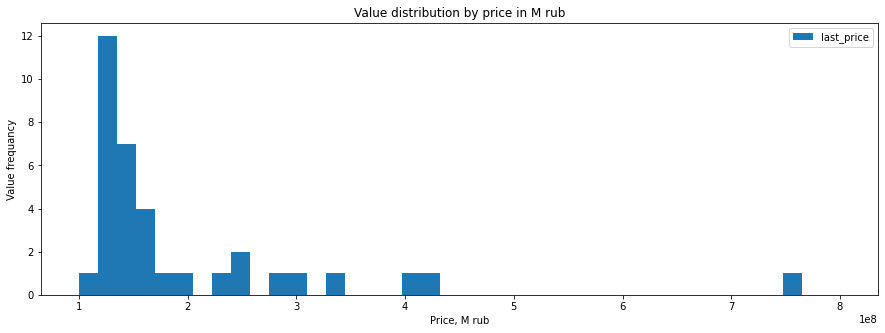

In [31]:
data.plot(kind='hist', title='Value distribution by price in M rub', y='last_price', bins=40, grid=False, range=(1*10**8, 8*10**8), figsize=(15,5))

plt.xlabel('Price, M rub')
plt.ylabel('Value frequancy')
plt.show()

We decided to save outliers in prices - prices in the city may be higher than in the settlement.

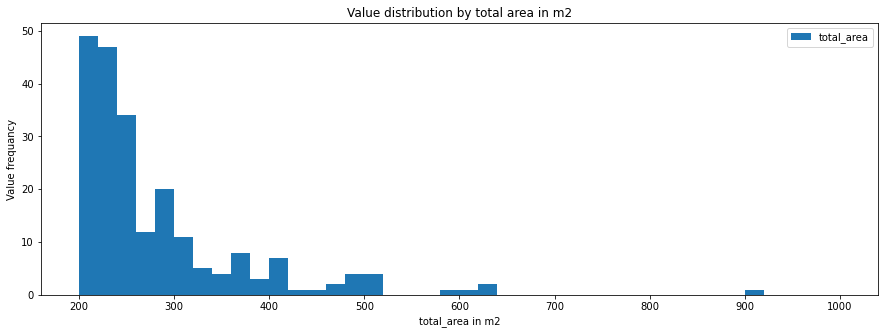

In [32]:
data.plot(kind='hist', title='Value distribution by total area in m2', y='total_area', bins=40, grid=False, range=(200, 1000),figsize=(15,5))

plt.xlabel('total_area in m2')
plt.ylabel('Value frequancy')
plt.show()

At first glance, an area of over 500 square meters can be considered as outliers.

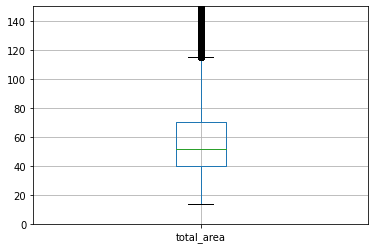

In [33]:
plt.ylim(0, 150)
data.boxplot('total_area')
plt.show()

Boxplot shows outliers after 118 m2

In [34]:
# total area of more than 118 square meters can be considered outliers. Let's remove data with such values
data = data[data['total_area'] <= 118]

In [35]:
# further change data format
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

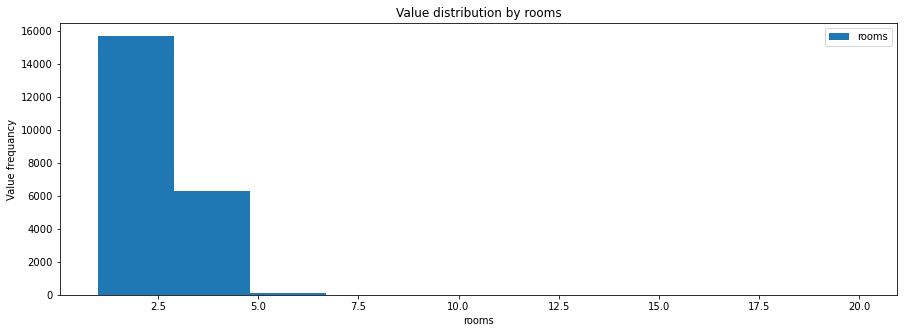

In [36]:
data.plot(kind='hist', title='Value distribution by rooms', y='rooms', grid=False, range=(1, 20), figsize=(15,5))

plt.xlabel('rooms')
plt.ylabel('Value frequancy')
plt.show()


The distribution of the number of rooms seems correct. The majority of advertisements fall within the range of up to 2 rooms.

In [37]:
# look at unique values of ceiling_height and count these values
data['ceiling_height'].value_counts()

2.70      7312
2.50      4139
2.60      2110
2.55      1554
2.75      1067
          ... 
4.80         1
26.00        1
5.00         1
14.00        1
100.00       1
Name: ceiling_height, Length: 178, dtype: int64

ceiling heights of over 10 meters are likely data entry errors. Therefore, all values ​​> 19m should be divided by 10. 1.9 m is min standart ceiling height

In [38]:
def ceiling_height_more_than_ten(row):
    if row['ceiling_height'] > 19:
        return row['ceiling_height'] * 0.1
    else:
        return row['ceiling_height']

In [39]:
# apply new values to ceiling_height column
data['ceiling_height'] = data.apply(ceiling_height_more_than_ten, axis=1)

2-roomed apartment in Kronstadt in a 60-storey building raises suspicion. It seems the 6th floor. Kronstadt is small town with 
Low-rise building

In [40]:
data[data['floors_total']>50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,7.4,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,14.0,0,Санкт-Петербург,20728.0,12978.0,1,793.0,0,NaN,45.0


In [41]:
# аssigning the floor value to 6.
data.loc[data['floors_total']==60, 'floors_total'] = 6

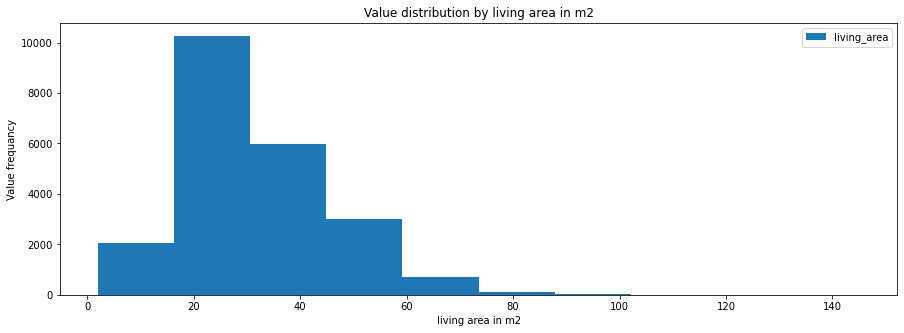

In [42]:
data.plot(kind='hist', title='Value distribution by living area in m2', y='living_area', grid=False, figsize=(15,5))

plt.xlabel('living area in m2')
plt.ylabel('Value frequancy')
plt.show()

Such outliers are possible. Data values are correlated to living area distribution. Saved it without changes

In [43]:
# last check for explicit duplicates
data.duplicated().sum()

0

***Summary of section:***

Data preprocessing has been performed. Missing data have been filled in where appropriate.
- Missing values ​​for ceiling heights have been replaced with median values ​​for each location.
- Missing values ​​for living area have been replaced with median values ​​for the number of rooms.
- Missing values ​​for kitchen area have been replaced with median values ​​based on the total area of the premises.
- Missing indicators for apartment ownership, number of balconies, number of nearby parks, and bodies of water have been filled with clearly obvious values: False, 0, 0, and 0, respectively.
- Missing indicators with minimal quantities have been removed using the dropna() method.
- Missing values ​​for distance to the airport and from the city center could be assigned median values ​​by location, but the number of missing values ​​does not decrease significantly. For now, we leave them as they are.
- Missing values ​​for distance to park, body of water, and date of advertisement placement are not filled in, as there is an obvious technical error in automatic filling.

An additional analysis was conducted for the list of locations, and implicit duplicates in this field of the table were eliminated. A check for explicit duplicates has been performed.

Some rare values ​​(outliers) have also been removed. Outliers exceeding 118 sq.m. were deleted. Although apartments and houses over 200 and 300 sq.m. are quite realistic offers, such outliers can have a negative impact on the calculation of averages.

## 3. Calculate and apply new columns to dataframe

In [44]:
# price for 1 m2
data['square_meter_price'] = round(data['last_price']/data['total_area'],0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82921.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0
5,10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,False,...,0,поселок городского типа Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95066.0


In [45]:
# Day of ads publication(0 — Monday, 1 — Tuesday and etc.)
data['week_day_exposition'] = data['first_day_exposition'].dt.dayofweek

In [46]:
# month od ads publication 
data['month_exposition'] = data['first_day_exposition'].dt.month

In [47]:
# Year of ads publication 
data['year_exposition'] = data['first_day_exposition'].dt.year

In [48]:
# Floor type (values — «first», «last», «other»)
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

In [49]:
# destination to citycenter in km (transform from m to km and rounde till integer value)
data['cityCenters_nearest_in_km'] = round(data['cityCenters_nearest'] / 1000, 0)

In [50]:
# display first 5 rows
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_in_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,NaN,0,NaN,81.0,82921.0,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,90.0,2,574.0,558.0,92786.0,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.0,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,False,...,NaN,0,NaN,55.0,95066.0,0,9,2018,другой,NaN


## 4. Exploratory Data Analysis

#### Task 1. Let's build a series of histograms to explore the most significant parameters:

- Total area;
- Living area;
- Kitchen area;
- Property price;
- Number of rooms;
- Ceiling height;
- Floor type of the apartment ("first", "last", "other");
- Total number of floors in the building;
- Distance to the city center in meters;
- Distance to the nearest park.

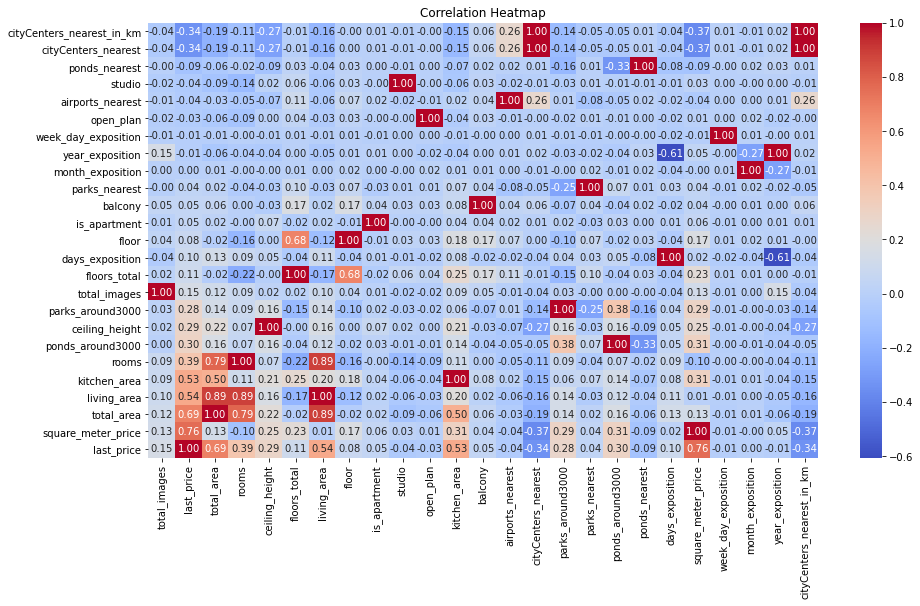

In [51]:
# look at above parameters with last_price

plt.figure(figsize=(15, 8))
sns.heatmap(data.corr().sort_values(by='last_price'), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Max correlation score is between last_price, total_area and kitchen_area (0.69, 0.54 и 0.53 соответственно). Also let's check other parameters through visualization.

In [52]:
data['total_area'].describe()

count    22174.000000
mean        54.866045
std         19.768533
min         14.000000
25%         40.000000
50%         50.530000
75%         66.000000
max        118.000000
Name: total_area, dtype: float64

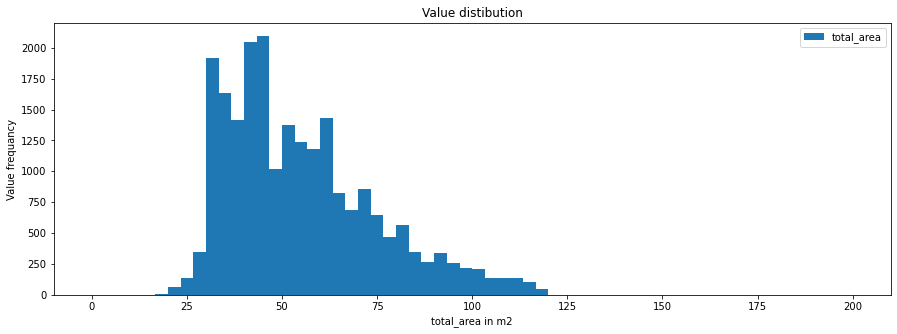

In [53]:
# limit total area till 200 m2 and look at distribution
data.plot(kind='hist', title='Value distibution', y='total_area', bins=60, grid=False, range=(0,200), figsize=(15,5))

plt.xlabel('total_area in m2')
plt.ylabel('Value frequancy')
plt.show()

Main part of values is between 30 and 50 m2. The peak value at the point is about 45 m2. Apartments with total area above 90-100 m2 are more expensiv, luxurious segment

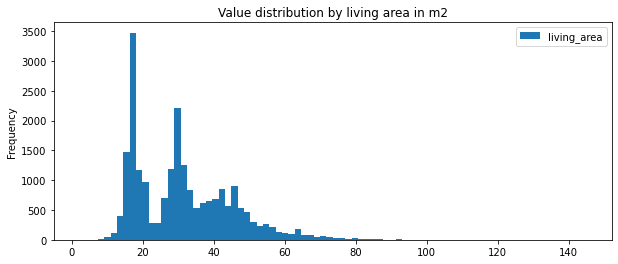

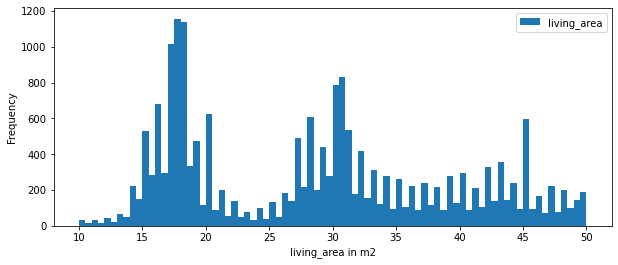

In [54]:
# seems that the main distribution of values lies in the range from 10 to 50. Next, see the histogram in these values
data.plot(kind='hist', title='Value distribution by living area in m2', y='living_area', bins=80, grid=False, figsize=(10,4))
data.plot(kind='hist', y='living_area', bins=80, grid=False, figsize=(10,4), range=(10,50))

plt.xlabel('living_area in m2')
plt.show()

There are three peaks at 18, 31 and 45 square meters, which individually represent a normal distribution. These values are frequent than other. 18 and 31 and 45 are standard squares for small, 1 roomed and 2 roomed  apartments.

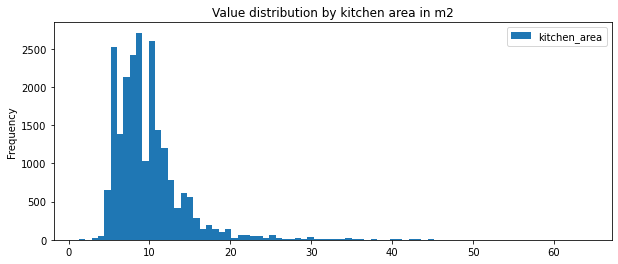

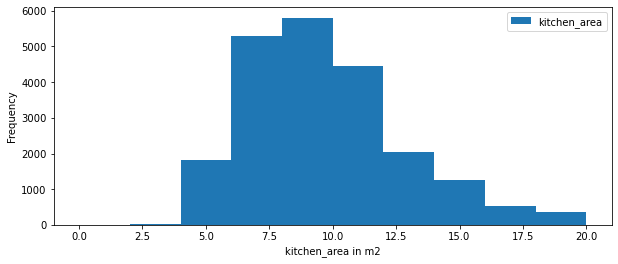

In [55]:
# seems that the main distribution of values lies in the segment up to 20. Next, see the histogram in these values
data.plot(kind='hist', title='Value distribution by kitchen area in m2', y='kitchen_area', bins=80, grid=False, figsize=(10,4))
data.plot(kind='hist', y='kitchen_area', bins=10, grid=False, figsize=(10,4), range=(0, 20))


plt.xlabel('kitchen_area in m2')
plt.show()

The main distribution of values falls on kitchens of 8-10 sq.m. But there are also number of small kitchens probably built by the Soviet or even in pre-revolutionary period.

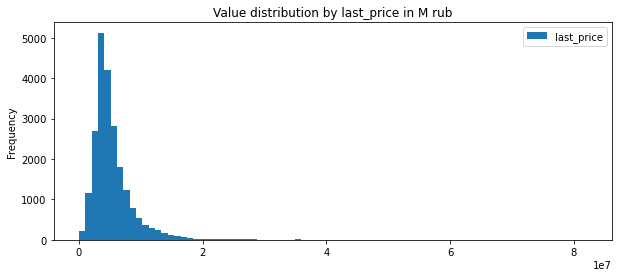

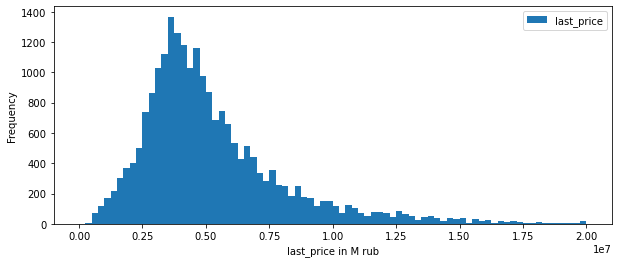

In [56]:
# seems that the main distribution of values lies in the interval up to 20,000,000. Next, see the histogram in these values
data.plot(kind='hist', title='Value distribution by last_price in M rub', y='last_price', bins=80, grid=False, figsize=(10,4))
data.plot(kind='hist', y='last_price', bins=80, grid=False, figsize=(10,4), range=(0,20000000))

plt.xlabel('last_price in M rub')
plt.show()

The main distribution of values are between 2.5-4 M rub. At the same time, a slower decrease in distribution density compared to growth indicates a large amount of real estate in the premium segment.

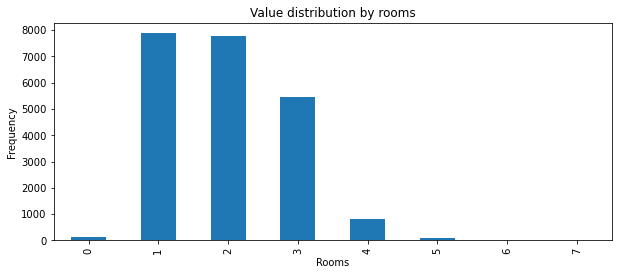

In [57]:
data['rooms'].value_counts().sort_index().plot(kind='bar', title='Value distribution by rooms', figsize=(10,4))

plt.xlabel('Rooms')
plt.ylabel('Frequency')
plt.show()

Most of the ads with the offer of 1-roomed apartments.

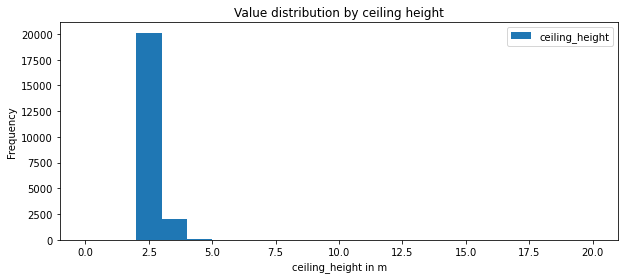

In [58]:
data.plot(kind='hist', title='Value distribution by ceiling height', y='ceiling_height', bins=20, grid=False, range = (0,20), figsize=(10,4))

plt.xlabel('ceiling_height in m')
plt.ylabel('Frequency')
plt.show()

The ceiling height is distributed plausibly. The main values are 2.5 m

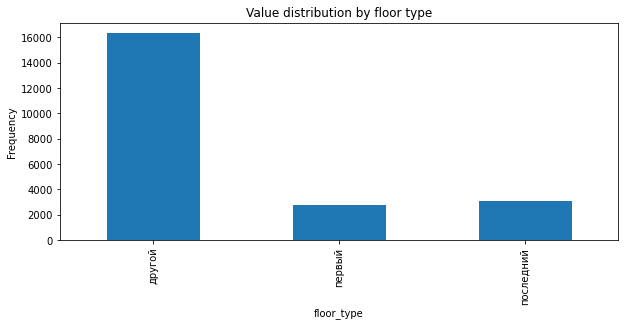

In [59]:
data['floor_type'].value_counts().sort_index().plot(kind='bar', title='Value distribution by floor type', figsize=(10,4))

plt.xlabel('floor_type')
plt.ylabel('Frequency')
plt.show()

Most of the real estate are on a floor under the category of Other, that is, not the first and not the last floor

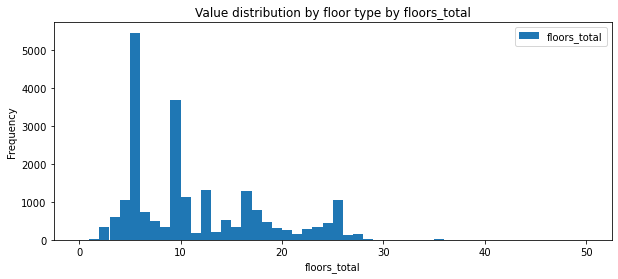

In [60]:
data.plot(kind='hist', title='Value distribution by floor type by floors_total', y='floors_total', bins=50, grid=False, range=(0,50), figsize=(10,4))

plt.xlabel('floors_total')
plt.ylabel('Frequency')
plt.show()

Top published froors total is 5 floored buildings (more than 5000 ads). Next popular publishes are between 7-9 floored-buldings.

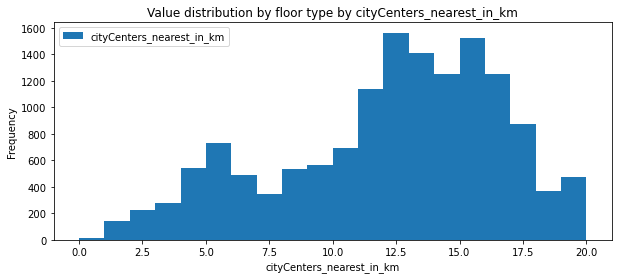

In [61]:
# seems that the main distribution of values lies in the interval up to 20 000 m. Next, see the histogram in these values
data.plot(kind='hist', title='Value distribution by floor type by cityCenters_nearest_in_km', y='cityCenters_nearest_in_km', \
                  bins=20, grid=False, figsize=(10,4), range=(0,20))

plt.xlabel('cityCenters_nearest_in_km')
plt.ylabel('Frequency')
plt.show()

On the hist of distance distribution, we see several peaks. Perhaps this indicates an uneven density of residential buildings. We observe the peak of ads at a distance of 12-12.5 km

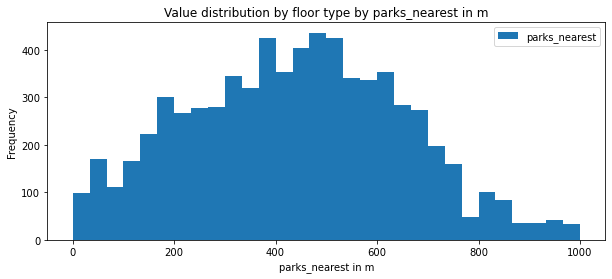

In [62]:
data.plot(kind='hist', title='Value distribution by floor type by parks_nearest in m', y='parks_nearest', \
                  bins=30, grid=False, figsize=(10,4), range=(0,1000) )

plt.xlabel('parks_nearest in m')
plt.ylabel('Frequency')
plt.show()

The values of the distances to the park are mainly in the range from 200 to 600 m

#### Task 2. Learninghow quickly apartments were sold (days_exposition column). This parameter shows how many days each ad was placed.

 - building a histogram..
 - calculating the average and median.
 - describing how long the sale usually takes. Which sales can be considered fast and which are unusually long?

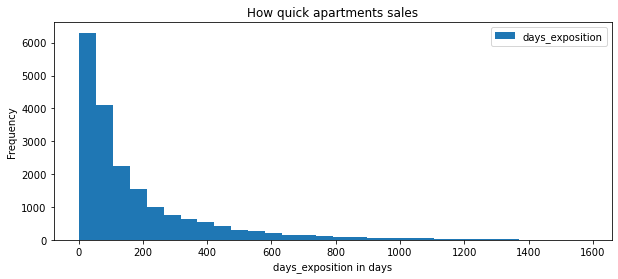

In [63]:
data.plot(kind='hist', title='How quick apartments sales', y='days_exposition', \
                  bins=30, grid=False, figsize=(10,4) )

plt.xlabel('days_exposition in days')
plt.ylabel('Frequency')
plt.show()

In [64]:
print('Average sales days ', data['days_exposition'].mean())
print('Median by day of sale', data['days_exposition'].median())

Average sales days  176.20959478341874
Median by day of sale 93.0


The median for the days of sale is almost twice lower than the average value. Perhaps quite expensive lots influenced the growth of the average value compared to the median.

In [65]:
data['days_exposition'].describe()

count    19323.000000
mean       176.209595
std        214.309342
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

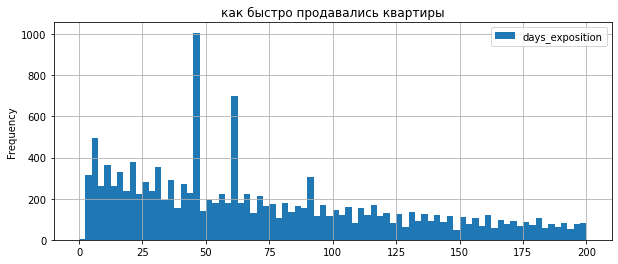

In [66]:
data.plot(kind='hist', title='как быстро продавались квартиры', y='days_exposition', \
                  bins=80, grid=True, figsize=(10,4), range=(0,200) )
plt.show()

The value of the standard deviation shows a large spread of data on the days of sale. According to the quartiles, it can be concluded that a relatively quick sale can be considered a period from 45 to 93 days. Less than 45 days is very fast. Sales of more than 225 days can be considered unusually long. Sales from 93 to 225 days can be called a relatively slow sales period.

Peaks are visible at values of 45, 60 and 90 days. This is probably due to the fact that after 1.5 - 2 months of unsuccessful sales, the seller lowers the price and finds a customer

#### Task 3. What factors most affect the total cost of object?
Learning whether the price depends on:

- the total area;
- living space;
- kitchen areas;
- number of rooms;
- the floor on which the apartment is located (first, last, other);
- dates of placement (day of the week, month, year).

Building graphs that show the dependence of the price on the above parameters. We will use `pivot_table()` to prepare the data before visualization.

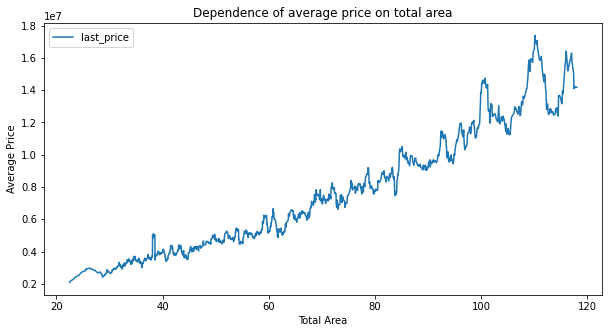

In [67]:
# Calculating the moving average
rolling_mean = data.pivot_table(index='total_area', values='last_price').rolling(window=15).mean()

# building visualization
rolling_mean.plot(style='-', title='Dependence of average price on total area', figsize=(10,5))
plt.xlabel('Total Area')
plt.ylabel('Average Price')
plt.show()

In [68]:
# calculeting correlation score between total_area and last_price
round(data['total_area'].corr(data['last_price']), 2)

0.69

The correlation score and the graph show a significant dependence of the price on the total area (0.69). The larger the area, the higher the price

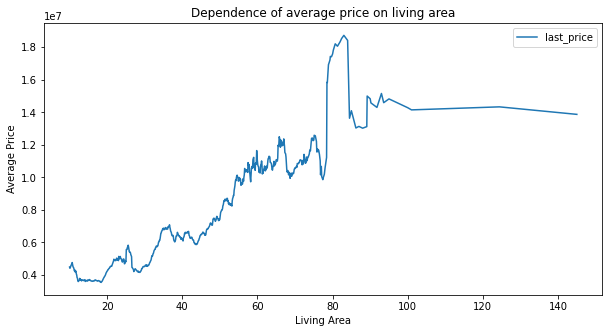

0.54


In [69]:
# Calculating the moving average
rolling_mean = data.pivot_table(index='living_area', values='last_price').rolling(window=15).mean()

# building visualization
rolling_mean.plot(style='-', title='Dependence of average price on living area', figsize=(10,5))
plt.xlabel('Living Area')
plt.ylabel('Average Price')
plt.show()

print(round(data['living_area'].corr(data['last_price']), 2))

The correlation calculation shows a slight dependence of the price on the living area (0.54). The graph shows a clearer relationship for an area from 30 to 70 sq.m. The remaining area values are more susceptible to price variation

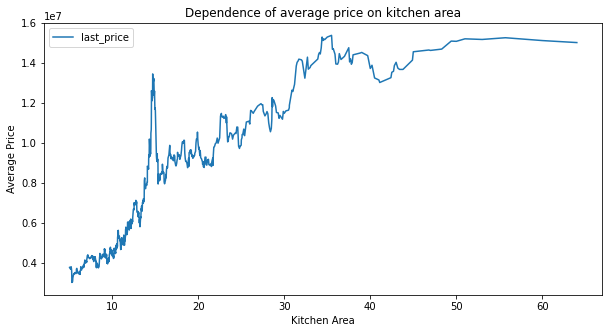

0.53


In [70]:
# Calculating the moving average
rolling_mean = data.pivot_table(index='kitchen_area', values='last_price').rolling(window=25).mean()

# building visualization
rolling_mean.plot(style='-', title='Dependence of average price on kitchen area', figsize=(10,5))
plt.xlabel('Kitchen Area')
plt.ylabel('Average Price')
plt.show()

print(round(data['kitchen_area'].corr(data['last_price']), 2))

The graph and the correlation calculation show a weak dependence of the price on the kitchen area. Rather, the larger the area of the apartment itself, the larger the kitchen area

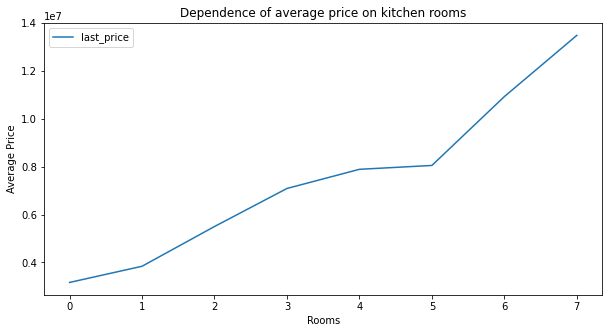

0.39


In [71]:
data.pivot_table(index='rooms', values='last_price')\
.plot(style='-',title='Dependence of average price on kitchen rooms', figsize=(10,5))

plt.xlabel('Rooms')
plt.ylabel('Average Price')
plt.show()

print(round(data['rooms'].corr(data['last_price']), 2))

The calculation of the correlation coefficient shows a very weak dependence of the price on the number of rooms. Although the situation looks different on the chart. At the same time, the price increases quite smoothly in the values from 1 to 4 rooms, then there is a sharp rise in price. Perhaps this is due to the fact that in the economy or comfort segment, apartments with rooms of more than 4 are no longer offered, followed by the premium segment with a large jump in price.

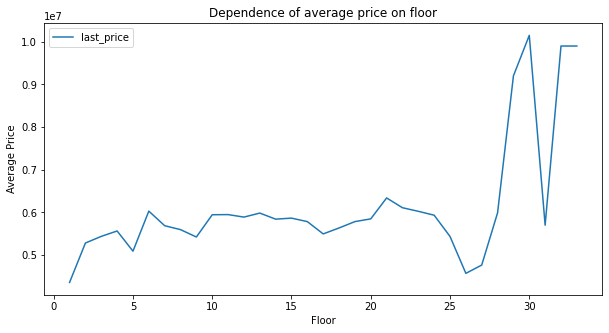

In [72]:
data.pivot_table(index='floor', values='last_price')\
.plot(style='-',title='Dependence of average price on floor', figsize=(10,5))

plt.xlabel('Floor')
plt.ylabel('Average Price')
plt.show()

We would say there is no correlation

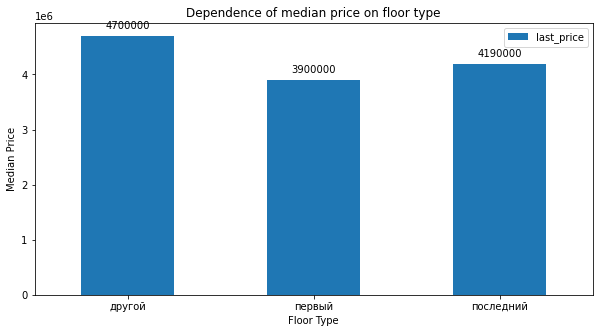

In [73]:
# Создаем сводную таблицу с медианными значениями цены по типу этажа
floor_price_median = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')

# Строим столбчатую диаграмму
ax = floor_price_median.plot(kind='bar', figsize=(10,5), title='Dependence of median price on floor type')

# Добавляем среднюю цену над каждым столбцом
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Floor Type')
plt.ylabel('Median Price')
plt.xticks(rotation=0)
plt.show()

The analysis of the median values shows the lowest cost of the first floors (3.9 million rubles), the highest median cost for other floors (4.7 million rubles)

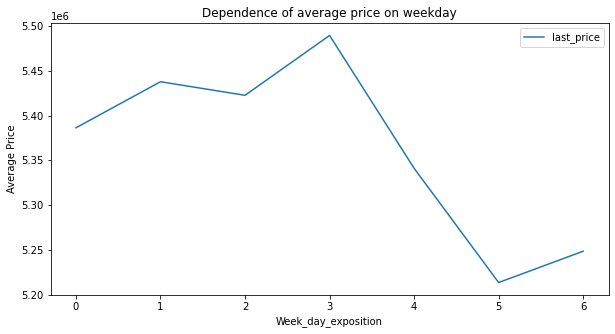

In [74]:
data.pivot_table(index='week_day_exposition', values='last_price')\
.plot(style='-',title='Dependence of average price on weekday', figsize=(10,5))

plt.xlabel('Week_day_exposition')
plt.ylabel('Average Price')
plt.show()

No correlation is here

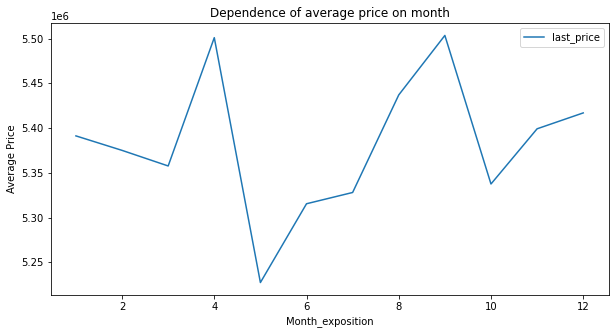

In [75]:
data.pivot_table(index='month_exposition', values='last_price')\
.plot(style='-',title='Dependence of average price on month', figsize=(10,5))

plt.xlabel('Month_exposition')
plt.ylabel('Average Price')
plt.show()

The dependence graph shows the seasonality. The peaks of the cost increase are visible in April and September. In May and October, there is a noticeable decline in prices

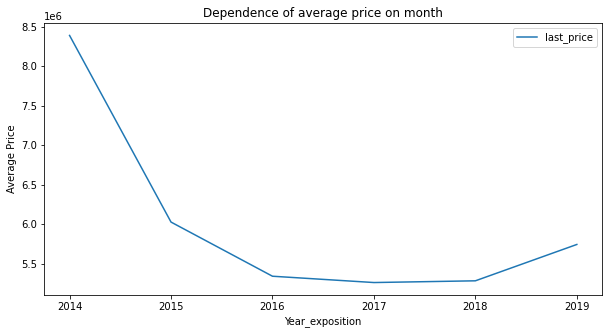

In [76]:
data.pivot_table(index='year_exposition', values='last_price')\
.plot(style='-',title='Dependence of average price on month', figsize=(10,5))

plt.xlabel('Year_exposition')
plt.ylabel('Average Price')
plt.show()

The negative dynamics of prices over the years rather indicates the gradual popularization of the segment of the low price category due to the mortgage crisis at the end of 2014. Since 2017, a natural price increase has been reflected.

#### Task 4. Calculating the average price per square meter in 10 localities with the largest number of ads

In [77]:
pivot_table = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean', 'median'])\
.sort_values(('count', 'last_price'), ascending=False)\
.head(10)\
.sort_values(('mean', 'last_price'), ascending=False)

pivot_table.columns = pivot_table.columns.droplevel(1)
pivot_table

,count,mean,median
locality_name,,,
Санкт-Петербург,14533,6.404601e+06,5300000.0
Пушкин,348,5.668922e+06,5050000.0
поселок Парголово,326,4.477609e+06,4100000.0
деревня Кудрово,287,4.308485e+06,3800000.0
поселок Шушары,437,4.081021e+06,3950000.0
Колпино,335,3.858248e+06,3600000.0
Всеволожск,393,3.755850e+06,3450000.0
поселок Мурино,519,3.735299e+06,3450000.0
Гатчина,304,3.450462e+06,3095000.0


Of the 10 locations with the largest number of ads, the maximum average cost in St. Petersburg, the minimum average cost in Vyborg.

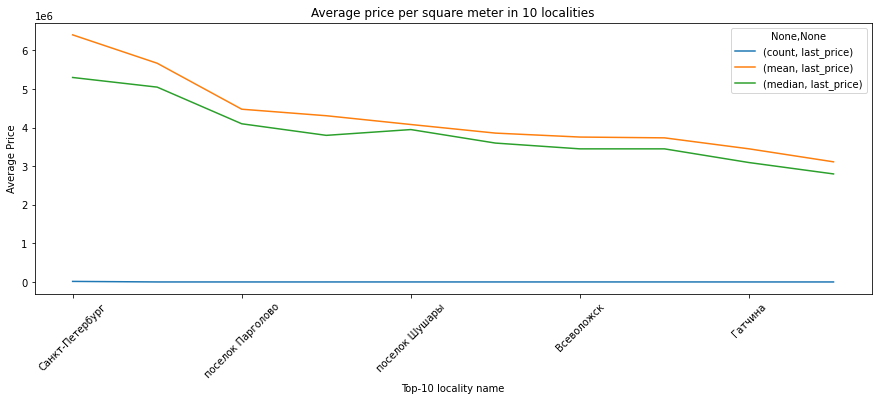

In [78]:
# визуализируем
data.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean', 'median'])\
.sort_values(('count', 'last_price'), ascending=False)\
.head(10)\
.sort_values(('mean', 'last_price'), ascending=False).plot(style='-',title='Average price per square meter in 10 localities', figsize=(15,5))

plt.xlabel('Top-10 locality name')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

#### Task 5. How does the cost of the objects depend on the distance to the city center

Earlier, we calculated the distance to the center in kilometers. Now let's select apartments in St. Petersburg using the locality_name column and calculate the average price of each kilometer

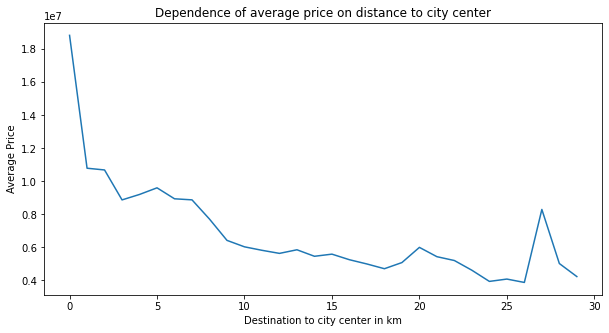

In [79]:
data[data['locality_name']=='Санкт-Петербург']\
.pivot_table(index='cityCenters_nearest_in_km', values=['last_price'], aggfunc=['mean'])\
.plot(style='-',title='Dependence of average price on distance to city center', figsize=(10,5))

plt.xlabel('Destination to city center in km')
plt.ylabel('Average Price')
plt.legend().remove()
plt.show()

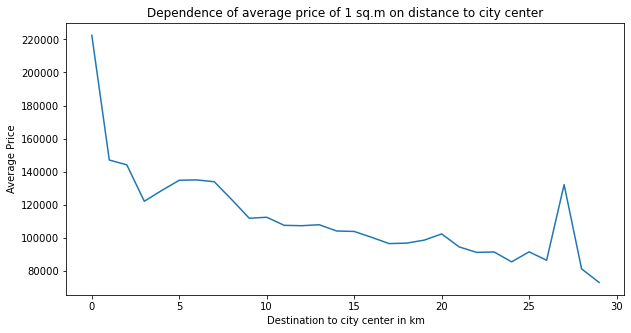

In [80]:
data[data['locality_name']=='Санкт-Петербург']\
.pivot_table(index='cityCenters_nearest_in_km', values=['square_meter_price'], aggfunc=['mean'])\
.plot(style='-',title='Dependence of average price of 1 sq.m on distance to city center', figsize=(10,5))

plt.xlabel('Destination to city center in km')
plt.ylabel('Average Price')
plt.legend().remove()
plt.show()

The analysis shows an obvious picture of a decrease in the average value of real estate when moving away from the center. There is a pronounced sharp increase in the cost in the very center from 2 to 0 km. At the same time, it is possible to note a decrease in cost at a distance of 3 km, and one of the peaks of cost for 5-7 km from the center. There is also a peak in price growth for a distance of 27 km (perhaps this is due to luxury real estate in the Leningrad region)

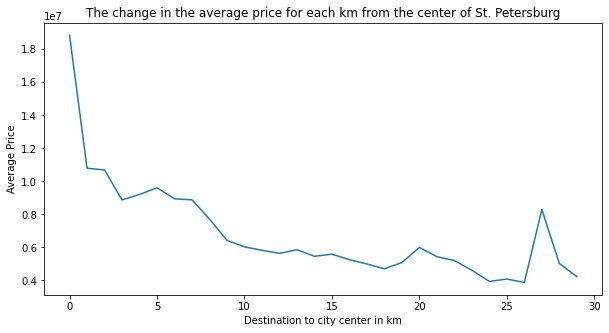

In [81]:
round(data.query('locality_name == "Санкт-Петербург"')\
.pivot_table(index='cityCenters_nearest_in_km', values='last_price', aggfunc='mean'),2)\
.plot(style='-',title='The change in the average price for each km from the center of St. Petersburg', figsize=(10, 5))

plt.xlabel('Destination to city center in km')
plt.ylabel('Average Price')
plt.legend().remove()
plt.show()

The highest average cost of 1 km is, as expected, in the very center - it reaches 19 million. The lowest average cost is in the area of 26 km from the center and is about 4 million. In general, the peaks of the average cost of 1 km are similar to the peaks with an average cost of 1 sq.m.

***Section summary:***

A exploratary analysis of the data was carried out.

The parameters of the objects were studied, their correlation coefficients were established and histograms were constructed.
- In general, all parameters have a normal distribution or Poisson distribution on the graphs, which indicates a minimal impact of emissions, if any.

It was studied how quickly apartments were sold.
- The value of the standard deviation shows a large spread of data on the days of sale. According to the quartiles, it can be concluded that a relatively quick sale can be considered a period from 45 to 93 days. Less than 45 days is very fast. Sales of more than 225 days can be considered unusually long. Sales from 93 to 225 days can be called a relatively slow sales period.

The factors that most affect the total (total) cost of the object have been studied.
- this is the total area, living area and kitchen area (in descending order of correlation coefficients).
- despite the fact that no correlation was found using the coefficient between the price of the object and the number of rooms, the graph shows an obvious relationship. Indeed, in real life, the cost of an object, depending on the number of rooms, increases/decreases to a certain value and segment.

We calculated the average price per square meter in 10 localities with the largest number of ads. We have built a summary table with the number of ads and the average price per square meter for these localities. The highest cost is in St. Petersburg, the lowest is in Vyborg.

How the cost of the objects depends on the distance to the city center. The highest average cost of 1 km, as expected, is in the very center - it reaches 19 million. The lowest average cost is around 26 km from the center and is about 4 million. In general, the peaks of the average cost of 1 km are similar to the peaks with an average cost of 1 sq.m.

<div style="border:solid blue 3px; padding: 20px">

### Main summary   
The project investigated data from the Yandex Real Estate service — an archive of ads for several years on the sale of apartments in St. Petersburg and neighboring settlements. We have learned how to determine the market value of real estate objects. The task was to conduct a research analysis of the data, which will help to establish the parameters that affect the price of objects.

Data preprocessing has been performed. Data types have been optimized. Data gaps have been filled in where appropriate.
- Additional analysis was carried out for the list of locations and implicit duplicates in this field of the table were eliminated. A check has been carried out for obvious duplicates.
- Also, as part of the data preprocessing, some rare values (outliers) have also been eliminated. Emissions in the total area of more than 118 square meters have been removed in order to avoid their impact on the results of the analysis.

Within the framework of the conducted research, certain features and dependencies existing in the real estate market of the region have been found.

- Most offers for apartments with a total area of 30 to 60 sq.m.
- The price distribution mainly lies with a maximum in the region of 3 - 4 million rubles.
- In the distribution by number of floors, the great advantage of values up to and including 5 floors is striking. We can say that most of the proposals fall on historical buildings that are low-rise. The advantage of the offers of 5 and 9 floors is confirmed on the diagram of the number of floors of the house.
- Most offers for apartments with a living area of about 18-20 sq.m.
- The value of the standard deviation shows a large spread of data on the days of sale. According to the quartiles, it can be concluded that a relatively quick sale can be considered a period from 45 to 93 days. Less than 45 days is very fast. Sales of more than 225 days can be considered unusually long. Sales from 93 to 225 days can be called a relatively slow sales period.
- Dependence of the average price on the total area, the minimum price spread is visible for an area up to 120 sq.m, the smallest spread for offers is from 30 to 50 sq.m.
- The correlation calculation shows a less significant dependence of the price on the living space. The graph shows a clearer relationship for an area from 10 to 60 sq.m. The remaining area values are more susceptible to price variation.
- The calculation of the correction shows a weak dependence of the price on the kitchen area and a complete lack of dependence of the price on the number of rooms. But according to the schedule and the test of the real-life hypothesis, the relationship between the price and the number of rooms still exists (according to the schedule, the number of rooms matters in the range from 1 to 4).
- The analysis of median values shows the lowest cost of the first floors, as well as a decrease in the cost of the last floors compared to the rest.
- The correlation coefficient shows that the price does not depend on the month of the ad submission. At the same time, the dependence graph shows seasonality. The peaks of the cost increase are visible during the New Year period, in April and July. In October, there was a noticeable decline in prices.
- As part of the study, the average price per square meter was calculated in 10 localities with the largest number of ads. Of the presented locations, the maximum average cost is in St. Petersburg, the minimum average cost is in Vyborg.
- The dependence of the average price on proximity to the city center is calculated separately for St. Petersburg. The highest average cost of 1 km, as expected, is in the very center - it reaches 19 million. The lowest average cost is around 26 km from the center and is about 4 million.